# Binomial Classification, Multinomial Classification, Bias Variance


In [8]:
import pandas as pd
import numpy as np
data1=pd.read_csv("binomial-classification-v1.csv")
data2=pd.read_csv("binomial-classification-v2.csv")


In [9]:
def classify_row(row):
    if row['actual'] == 1 and row['predicted'] == 1:
        return "true_positive"
    elif row['actual'] == 0 and row['predicted'] == 0:
        return "true_negative"
    elif row['actual'] == 0 and row['predicted'] == 1:
        return "false_positive"
    elif row['actual'] == 1 and row['predicted'] == 0:
        return "false_negative"
    return "undefined"

# Add classification to both datasets
data1['classification'] = data1.apply(classify_row, axis=1)
data2['classification'] = data2.apply(classify_row, axis=1)

# Select one record for each classification category
results_v1 = data1.groupby('classification').first()
results_v2 = data2.groupby('classification').first()
print("For binomial-classification-v1.csv")
print(results_v1)
print("For binomial-classification-v2.csv")
print(results_v2)

For binomial-classification-v1.csv
                Unnamed: 0  actual  predicted
classification                               
false_negative           0       1          0
false_positive           1       0          1
true_negative           10       0          0
true_positive           20       1          1
For binomial-classification-v2.csv
                Unnamed: 0  actual  predicted
classification                               
false_negative          10       1          0
false_positive          79       0          1
true_negative            0       0          0
true_positive           11       1          1


In [11]:
def compute_metrics(actual, predicted):
    TP = np.where((actual == 1) & (predicted == 1),1,0)
    TN = np.where((actual == 0) & (predicted == 0),1,0)
    FP = np.where((actual == 0) & (predicted == 1),1,0)
    FN = np.where((actual == 1) & (predicted == 0),1,0)
    metrics = pd.DataFrame()
    metrics["actual"] = actual
    metrics["predicted"] = predicted
    metrics["TP"] = TP
    metrics["TN"] = TN
    metrics["FP"] = FP
    metrics["FN"] = FN
    return metrics, TP, TN, FP, FN
metrics, TP, TN, FP, FN = compute_metrics(data1['actual'], data1['predicted'])
TP = np.sum(TP)
TN = np.sum(TN)
FP = np.sum(FP)
FN = np.sum(FN)

# manual
accuracy_mn = (TP+TN)/(TP+TN+FP+FN)
precision_mn = (TP)/(TP+FP)
recall_mn = TP/(TP+FN)
f1_score_mn = 2*(precision_mn*recall_mn)/(precision_mn+recall_mn)
specificity_mn = TN/(TN+FP)

compareResults = \
    pd.DataFrame(
    {
     "metric":["accuracy","precision","recall","f1_score"],
     "manual":[accuracy_mn,precision_mn,recall_mn,f1_score_mn]
    }
    )
print("For binomial-classification-v1.csv")
print(compareResults)

For binomial-classification-v1.csv
      metric    manual
0   accuracy  0.048605
1  precision  0.046512
2     recall  0.046502
3   f1_score  0.046507


In [12]:
metrics, TP, TN, FP, FN = compute_metrics(data2['actual'], data2['predicted'])
TP = np.sum(TP)
TN = np.sum(TN)
FP = np.sum(FP)
FN = np.sum(FN)

# manual
accuracy_mn = (TP+TN)/(TP+TN+FP+FN)
precision_mn = (TP)/(TP+FP)
recall_mn = TP/(TP+FN)
f1_score_mn = 2*(precision_mn*recall_mn)/(precision_mn+recall_mn)
specificity_mn = TN/(TN+FP)

compareResults = \
    pd.DataFrame(
    {
     "metric":["accuracy","precision","recall","f1_score"],
     "manual":[accuracy_mn,precision_mn,recall_mn,f1_score_mn]
    }
    )
print("For binomial-classification-v2.csv")
print(compareResults)

For binomial-classification-v2.csv
      metric    manual
0   accuracy  0.948495
1  precision  0.948876
2     recall  0.948687
3   f1_score  0.948782


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
accuracy_skl = accuracy_score(data1['actual'], data1['predicted'])
precision_skl = precision_score(data1['actual'], data1['predicted'])
recall_skl = recall_score(data1['actual'], data1['predicted'])
f1_score_skl = f1_score(data1['actual'], data1['predicted'])

accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(data1['actual'], data1['predicted'])
accuracy_tf = accuracy.result().numpy()

precision = tf.keras.metrics.Precision()
precision.update_state(data1['actual'], data1['predicted'])
precision_tf = precision.result().numpy()

recall = tf.keras.metrics.Recall()
recall.update_state(data1['actual'], data1['predicted'])
recall_tf = recall.result().numpy()

f1_score_tf = 2 * (precision_tf * recall_tf) / (precision_tf + recall_tf)

compareResults = \
    pd.DataFrame(
    {
     "metric":["accuracy","precision","recall","f1_score"],
     "sklearn":[accuracy_skl,precision_skl,recall_skl,f1_score_skl],
     "tensorflow":[accuracy_tf,precision_tf,recall_tf,f1_score_tf]
    }
    )
print("For binomial-classification-v1.csv")
print(compareResults)

2025-01-14 10:53:47.940035: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


For binomial-classification-v1.csv
      metric   sklearn  tensorflow
0   accuracy  0.048605    0.048605
1  precision  0.046512    0.046512
2     recall  0.046502    0.046502
3   f1_score  0.046507    0.046507


In [15]:
accuracy_skl = accuracy_score(data2['actual'], data2['predicted'])
precision_skl = precision_score(data2['actual'], data2['predicted'])
recall_skl = recall_score(data2['actual'], data2['predicted'])
f1_score_skl = f1_score(data2['actual'], data2['predicted'])

accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(data2['actual'], data2['predicted'])
accuracy_tf = accuracy.result().numpy()

precision = tf.keras.metrics.Precision()
precision.update_state(data2['actual'], data2['predicted'])
precision_tf = precision.result().numpy()

recall = tf.keras.metrics.Recall()
recall.update_state(data2['actual'], data2['predicted'])
recall_tf = recall.result().numpy()

f1_score_tf = 2 * (precision_tf * recall_tf) / (precision_tf + recall_tf)

compareResults = \
    pd.DataFrame(
    {
     "metric":["accuracy","precision","recall","f1_score"],
     "sklearn":[accuracy_skl,precision_skl,recall_skl,f1_score_skl],
     "tensorflow":[accuracy_tf,precision_tf,recall_tf,f1_score_tf]
    }
    )
print("For binomial-classification-v2.csv")
print(compareResults)

For binomial-classification-v2.csv
      metric   sklearn  tensorflow
0   accuracy  0.948495    0.948495
1  precision  0.948876    0.948876
2     recall  0.948687    0.948687
3   f1_score  0.948782    0.948782


In [17]:
metrics, TP, TN, FP, FN = compute_metrics(data1['actual'], data1['predicted'])
TP = np.sum(TP)
TN = np.sum(TN)
FP = np.sum(FP)
FN = np.sum(FN)

# manual
accuracy_mn = (TP+TN)/(TP+TN+FP+FN)
precision_mn = (TP)/(TP+FP)
recall_mn = TP/(TP+FN)
f1_score_mn = 2*(precision_mn*recall_mn)/(precision_mn+recall_mn)
specificity_mn = TN/(TN+FP)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
accuracy_skl = accuracy_score(data1['actual'], data1['predicted'])
precision_skl = precision_score(data1['actual'], data1['predicted'])
recall_skl = recall_score(data1['actual'], data1['predicted'])
f1_score_skl = f1_score(data1['actual'], data1['predicted'])

accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(data1['actual'], data1['predicted'])
accuracy_tf = accuracy.result().numpy()

precision = tf.keras.metrics.Precision()
precision.update_state(data1['actual'], data1['predicted'])
precision_tf = precision.result().numpy()

recall = tf.keras.metrics.Recall()
recall.update_state(data1['actual'], data1['predicted'])
recall_tf = recall.result().numpy()

f1_score_tf = 2 * (precision_tf * recall_tf) / (precision_tf + recall_tf)

compareResults = \
    pd.DataFrame(
    {
     "metric":["accuracy","precision","recall","f1_score"],
     "manual":[accuracy_mn,precision_mn,recall_mn,f1_score_mn],
     "sklearn":[accuracy_skl,precision_skl,recall_skl,f1_score_skl],
     "tensorflow":[accuracy_tf,precision_tf,recall_tf,f1_score_tf]
    }
    )
print("For binomial-classification-v1.csv")
print(compareResults)

For binomial-classification-v1.csv
      metric    manual   sklearn  tensorflow
0   accuracy  0.048605  0.048605    0.048605
1  precision  0.046512  0.046512    0.046512
2     recall  0.046502  0.046502    0.046502
3   f1_score  0.046507  0.046507    0.046507


In [18]:
metrics, TP, TN, FP, FN = compute_metrics(data2['actual'], data2['predicted'])
TP = np.sum(TP)
TN = np.sum(TN)
FP = np.sum(FP)
FN = np.sum(FN)

# manual
accuracy_mn = (TP+TN)/(TP+TN+FP+FN)
precision_mn = (TP)/(TP+FP)
recall_mn = TP/(TP+FN)
f1_score_mn = 2*(precision_mn*recall_mn)/(precision_mn+recall_mn)
specificity_mn = TN/(TN+FP)
accuracy_skl = accuracy_score(data2['actual'], data2['predicted'])
precision_skl = precision_score(data2['actual'], data2['predicted'])
recall_skl = recall_score(data2['actual'], data2['predicted'])
f1_score_skl = f1_score(data2['actual'], data2['predicted'])

accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(data2['actual'], data2['predicted'])
accuracy_tf = accuracy.result().numpy()

precision = tf.keras.metrics.Precision()
precision.update_state(data2['actual'], data2['predicted'])
precision_tf = precision.result().numpy()

recall = tf.keras.metrics.Recall()
recall.update_state(data2['actual'], data2['predicted'])
recall_tf = recall.result().numpy()

f1_score_tf = 2 * (precision_tf * recall_tf) / (precision_tf + recall_tf)

compareResults = \
    pd.DataFrame(
    {
     "metric":["accuracy","precision","recall","f1_score"],
     "manual":[accuracy_mn,precision_mn,recall_mn,f1_score_mn],
     "sklearn":[accuracy_skl,precision_skl,recall_skl,f1_score_skl],
     "tensorflow":[accuracy_tf,precision_tf,recall_tf,f1_score_tf]
    }
    )
print("For binomial-classification-v2.csv")
print(compareResults)

For binomial-classification-v2.csv
      metric    manual   sklearn  tensorflow
0   accuracy  0.948495  0.948495    0.948495
1  precision  0.948876  0.948876    0.948876
2     recall  0.948687  0.948687    0.948687
3   f1_score  0.948782  0.948782    0.948782


In [21]:
data3=pd.read_csv("binomial-classification-v3.csv")
data3['log_loss'] = data3['y1'] * np.log(data3['p1']) + data3['y2'] * np.log(data3['p2'])
log_loss = -np.mean(data3['log_loss'])

print("Log Loss Manual:",log_loss)

Log Loss Manual: 0.31998196154710273


In [25]:
from sklearn.metrics import log_loss
import numpy as np
p1=data3['p1']
p2=data3['p2']
y1=data3['y1']
y2=data3['y2']

actuals = np.concatenate([y1, y2])
predictions = np.concatenate([p1, p2])

# Computing log loss using sklearn
sklearn_log_loss = log_loss(actuals, predictions)

# Computing log loss using TensorFlow
y_true = tf.constant(actuals, dtype=tf.float32)
y_pred = tf.constant(predictions, dtype=tf.float32)

tensorflow_log_loss = tf.reduce_mean(
    -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
).numpy()
sklearn_log_loss, tensorflow_log_loss
print("Log Loss Sklearn:",sklearn_log_loss)
print("Log Loss Tensorflow:",tensorflow_log_loss)

Log Loss Sklearn: 0.3199819615471027
Log Loss Tensorflow: 0.31998193


In [46]:
compareResults = \
    pd.DataFrame(
    {
     "metric":["Log Loss"],
     "manual":[log_loss],
     "sklearn":[sklearn_log_loss],
     "tensorflow":[tensorflow_log_loss]
    }
    )
print("For binomial-classification-v2.csv")
print(compareResults)

For binomial-classification-v2.csv
     metric                              manual   sklearn  tensorflow
0  Log Loss  <function log_loss at 0x1350b0f40>  0.319982    0.319982


In [29]:
data4=pd.read_csv("regression-v1.csv")

In [31]:
n=len(data4)
y=data4["y"]
yh=data4["yhat"]
ybar=np.mean(y)
mse = (1/n) * np.sum((data4["y"] - data4["yhat"]) ** 2)
mae= (1/n) * np.sum(np.abs(data4["y"] - data4["yhat"]))
r2 = 1 - (np.sum((data4["y"] - data4["yhat"])**2)) / (np.sum((data4["y"] - ybar)**2))
ev=1-((np.var(y-yh))/(np.var(y)))
mape=(1/n)*np.sum(np.abs((y-yh)/y))*100
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("R-squared:",r2)
print("Explained Variance Score:",ev)
print("Mean Absolute Percentage Error:",mape,"%")

Mean Absolute Error: 0.12176198368693504
Mean Squared Error: 0.022933380701432377
R-squared: 0.9074006311244875
Explained Variance Score: 0.9075476866547145
Mean Absolute Percentage Error: 264.1838975226423 %


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import tensorflow as tf

# Extract actual and predicted values
y_true = data4['y'].values
y_pred = data4['yhat'].values

# Calculate metrics using Sklearn
mse_sklearn = mean_squared_error(y_true, y_pred)
mae_sklearn = mean_absolute_error(y_true, y_pred)
r2_sklearn = r2_score(y_true, y_pred)
explained_variance_sklearn = explained_variance_score(y_true, y_pred)
mape_sklearn = mean_absolute_percentage_error(y_true, y_pred)*100

# Print Sklearn results
print("Using Sklearn:")
print(f"Mean Absolute Error (MAE): {mae_sklearn:.4f}")
print(f"Mean Squared Error (MSE): {mse_sklearn:.4f}")
print(f"R-squared (R²): {r2_sklearn:.4f}")
print(f"Explained Variance Score: {explained_variance_sklearn:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_sklearn:.4f}%")
print("\n")

# Calculate metrics using TensorFlow
mae_tf = tf.reduce_mean(tf.abs(y_true - y_pred)).numpy()
mse_tf = tf.reduce_mean(tf.square(y_true - y_pred)).numpy()
r2_tf = r2_score(y_true, y_pred)
explained_variance_tf = explained_variance_score(y_true, y_pred)
mape_tf = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)*100).numpy()

# Prepare results
metrics_tf = {
    "Mean Absolute Error (MAE)": mae_tf,
    "Mean Squared Error (MSE)": mse_tf,
    "R2 Score": r2_tf,
    "Explained Variance Score": explained_variance_tf,
    "Mean Absolute Percentage Error (MAPE)": mape_tf,
}

# Print TensorFlow results
print("Using TensorFlow:")
for metric, value in metrics_tf.items():
    print(f"{metric}: {value:.4f}")


Using Sklearn:
Mean Absolute Error (MAE): 0.1218
Mean Squared Error (MSE): 0.0229
R-squared (R²): 0.9074
Explained Variance Score: 0.9075
Mean Absolute Percentage Error (MAPE): 264.1839%


Using TensorFlow:
Mean Absolute Error (MAE): 0.1218
Mean Squared Error (MSE): 0.0229
R2 Score: 0.9074
Explained Variance Score: 0.9075
Mean Absolute Percentage Error (MAPE): 264.1839


In [37]:
n=len(data4)
y=data4["y"]
yh=data4["yhat"]
ybar=np.mean(y)
mse = (1/n) * np.sum((data4["y"] - data4["yhat"]) ** 2)
mae= (1/n) * np.sum(np.abs(data4["y"] - data4["yhat"]))
r2 = 1 - (np.sum((data4["y"] - data4["yhat"])**2)) / (np.sum((data4["y"] - ybar)**2))
ev=1-((np.var(y-yh))/(np.var(y)))
mape=(1/n)*np.sum(np.abs((y-yh)/y))*100
print("Manual:")
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("R-squared:",r2)
print("Explained Variance Score:",ev)
print("Mean Absolute Percentage Error:",mape)
print("\n")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import tensorflow as tf

# Extract actual and predicted values
y_true = data4['y'].values
y_pred = data4['yhat'].values

# Calculate metrics using Sklearn
mse_sklearn = mean_squared_error(y_true, y_pred)
mae_sklearn = mean_absolute_error(y_true, y_pred)
r2_sklearn = r2_score(y_true, y_pred)
explained_variance_sklearn = explained_variance_score(y_true, y_pred)
mape_sklearn = mean_absolute_percentage_error(y_true, y_pred)*100

# Print Sklearn results
print("Using Sklearn:")
print(f"Mean Absolute Error (MAE): {mae_sklearn:}")
print(f"Mean Squared Error (MSE): {mse_sklearn:}")
print(f"R-squared (R²): {r2_sklearn:}")
print(f"Explained Variance Score: {explained_variance_sklearn:}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_sklearn:}")
print("\n")

# Calculate metrics using TensorFlow
mae_tf = tf.reduce_mean(tf.abs(y_true - y_pred)).numpy()
mse_tf = tf.reduce_mean(tf.square(y_true - y_pred)).numpy()
r2_tf = r2_score(y_true, y_pred)
explained_variance_tf = explained_variance_score(y_true, y_pred)
mape_tf = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)*100).numpy()

# Prepare results
metrics_tf = {
    "Mean Absolute Error (MAE)": mae_tf,
    "Mean Squared Error (MSE)": mse_tf,
    "R2 Score": r2_tf,
    "Explained Variance Score": explained_variance_tf,
    "Mean Absolute Percentage Error (MAPE)": mape_tf,
}

# Print TensorFlow results
print("Using TensorFlow:")
for metric, value in metrics_tf.items():
    print(f"{metric}: {value:}")



Manual:
Mean Absolute Error: 0.12176198368693504
Mean Squared Error: 0.022933380701432377
R-squared: 0.9074006311244875
Explained Variance Score: 0.9075476866547145
Mean Absolute Percentage Error: 264.1838975226423


Using Sklearn:
Mean Absolute Error (MAE): 0.12176198368693504
Mean Squared Error (MSE): 0.022933380701432377
R-squared (R²): 0.9074006311244875
Explained Variance Score: 0.9075476866547145
Mean Absolute Percentage Error (MAPE): 264.1838975226423


Using TensorFlow:
Mean Absolute Error (MAE): 0.12176198368693504
Mean Squared Error (MSE): 0.022933380701432377
R2 Score: 0.9074006311244875
Explained Variance Score: 0.9075476866547145
Mean Absolute Percentage Error (MAPE): 264.1838975226424


In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

# Load the dataset
file_path = 'multinomial-classification-v1.csv'
df = pd.read_csv(file_path)

# Extract predicted classes (class with the highest probability)
predicted = df[['p1', 'p2', 'p3']].idxmax(axis=1).str[-1].astype(int)  # Extract the index of the max probability

# Extract actual classes (class with the '1' in one-hot encoding)
actual = df[['y1', 'y2', 'y3']].idxmax(axis=1).str[-1].astype(int)  # Extract the index of the '1'

# 1. Manually compute the metrics
unique_classes = list(set(actual))  # Identify unique classes

# Initialize variables for precision, recall, and F1 score
precision_manual = []
recall_manual = []
f1_manual = []

for cls in unique_classes:
    tp = sum((a == cls and p == cls) for a, p in zip(actual, predicted))
    fp = sum((a != cls and p == cls) for a, p in zip(actual, predicted))
    fn = sum((a == cls and p != cls) for a, p in zip(actual, predicted))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    precision_manual.append(precision)
    recall_manual.append(recall)
    f1_manual.append(f1)

# Accuracy
accuracy_manual = sum(a == p for a, p in zip(actual, predicted)) / len(actual)

# Average precision, recall, and F1 score
precision_avg_manual = np.mean(precision_manual)
recall_avg_manual = np.mean(recall_manual)
f1_avg_manual = np.mean(f1_manual)

print("\nManually Computed Metrics:")
print("Accuracy:", accuracy_manual)
print("Precision (avg):", precision_avg_manual)
print("Recall (avg):", recall_avg_manual)
print("F1 Score (avg):", f1_avg_manual)

# 2. Compute the metrics using sklearn
accuracy_sklearn = accuracy_score(actual, predicted)
precision_sklearn = precision_score(actual, predicted, average='macro')
recall_sklearn = recall_score(actual, predicted, average='macro')
f1_sklearn = f1_score(actual, predicted, average='macro')

print("\nMetrics using sklearn:")
print("Accuracy:", accuracy_sklearn)
print("Precision (avg):", precision_sklearn)
print("Recall (avg):", recall_sklearn)
print("F1 Score (avg):", f1_sklearn)

# 3. Compute the metrics using TensorFlow
y_true = tf.constant(actual.tolist(), dtype=tf.int32)
y_pred = tf.constant(predicted.tolist(), dtype=tf.int32)

accuracy_tf = tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32)).numpy()

# Precision, Recall, F1 Score using TensorFlow (macro average)
precision_tf = []
recall_tf = []
f1_tf = []

for cls in unique_classes:
    tp = tf.reduce_sum(tf.cast((y_true == cls) & (y_pred == cls), tf.float32)).numpy()
    fp = tf.reduce_sum(tf.cast((y_true != cls) & (y_pred == cls), tf.float32)).numpy()
    fn = tf.reduce_sum(tf.cast((y_true == cls) & (y_pred != cls), tf.float32)).numpy()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    precision_tf.append(precision)
    recall_tf.append(recall)
    f1_tf.append(f1)

precision_avg_tf = np.mean(precision_tf)
recall_avg_tf = np.mean(recall_tf)
f1_avg_tf = np.mean(f1_tf)

print("\nMetrics using TensorFlow:")
print("Accuracy:", accuracy_tf)
print("Precision (avg):", precision_avg_tf)
print("Recall (avg):", recall_avg_tf)
print("F1 Score (avg):", f1_avg_tf)

# 4. Show the values matching across all three computing approaches
print("\nMatching Values Across All Approaches:")
print(f"Accuracy: Manual={accuracy_manual}, Sklearn={accuracy_sklearn}, TensorFlow={accuracy_tf}")
print(f"Precision (avg): Manual={precision_avg_manual}, Sklearn={precision_sklearn}, TensorFlow={precision_avg_tf}")
print(f"Recall (avg): Manual={recall_avg_manual}, Sklearn={recall_sklearn}, TensorFlow={recall_avg_tf}")
print(f"F1 Score (avg): Manual={f1_avg_manual}, Sklearn={f1_sklearn}, TensorFlow={f1_avg_tf}")


Manually Computed Metrics:
Accuracy: 0.794
Precision (avg): 0.5673102666868218
Recall (avg): 0.6192590684116108
F1 Score (avg): 0.5768183444997227

Metrics using sklearn:
Accuracy: 0.794
Precision (avg): 0.5673102666868218
Recall (avg): 0.6192590684116108
F1 Score (avg): 0.5768183444997227

Metrics using TensorFlow:
Accuracy: 0.794
Precision (avg): 0.5673103
Recall (avg): 0.61925906
F1 Score (avg): 0.5768183508423677

Matching Values Across All Approaches:
Accuracy: Manual=0.794, Sklearn=0.794, TensorFlow=0.7940000295639038
Precision (avg): Manual=0.5673102666868218, Sklearn=0.5673102666868218, TensorFlow=0.5673102736473083
Recall (avg): Manual=0.6192590684116108, Sklearn=0.6192590684116108, TensorFlow=0.6192590594291687
F1 Score (avg): Manual=0.5768183444997227, Sklearn=0.5768183444997227, TensorFlow=0.5768183508423677


### Bias Variance

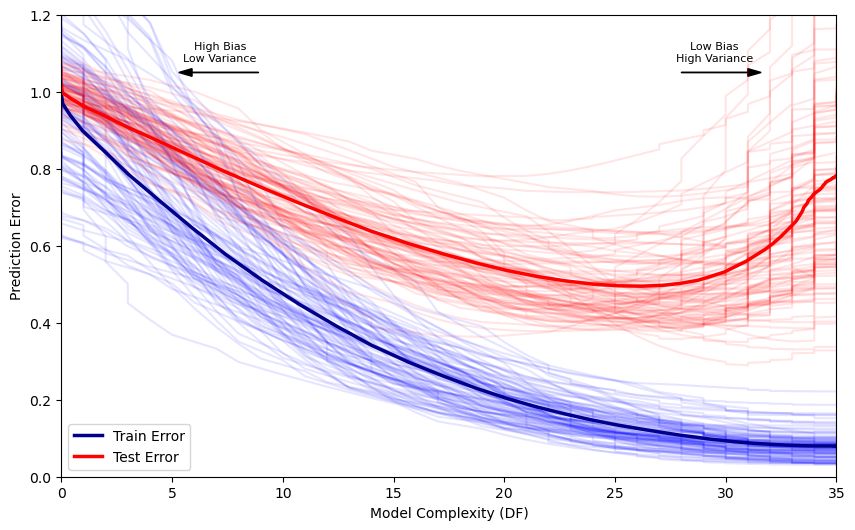

In [44]:
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d  # For smoothing the curves

# Parameters
train_size = 50
test_size = 1000
N = train_size + test_size
num_variables = 35
num_iterations = 100
alpha_values = np.logspace(-6, 1, 100)

np.random.seed(7)
sd_X = 1
sd_beta = 0.145
sd_noise = 0.45

train_RSS_all = []
test_RSS_all = []
complexities = []

plt.figure(figsize=(10,6))

plt.ylim(0, 1.2)
plt.xlim(0, num_variables)
plt.xlabel('Model Complexity (DF)')
plt.ylabel('Prediction Error')

# Define the population to draw from
beta = np.random.normal(0, sd_beta, size=(num_variables, 1))

for i in range(num_iterations):
    noise = np.random.normal(0, sd_noise, size=(N, 1))
    X = np.random.normal(0, sd_X, size=(N, num_variables))
    Y = X @ beta + noise

    train_X = X[:train_size, :]
    test_X = X[train_size:, :]
    train_Y = Y[:train_size]
    test_Y = Y[train_size:]

    scaler = StandardScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    train_RSS = []
    test_RSS = []
    complexity = []

    # Fit Lasso for each alpha and calculate RSS
    for alpha in alpha_values:
        model = LassoLars(alpha=alpha, fit_intercept=False)
        model.fit(train_X, train_Y.ravel())

        train_pred = model.predict(train_X)
        test_pred = model.predict(test_X)
        
        train_RSS.append(mean_squared_error(train_Y, train_pred))
        test_RSS.append(mean_squared_error(test_Y, test_pred))
        
        complexity.append(np.sum(model.coef_ != 0))

    # Smooth the lines for each iteration
    train_RSS_smooth = gaussian_filter1d(train_RSS, sigma=2)
    test_RSS_smooth = gaussian_filter1d(test_RSS, sigma=2)
    complexity_smooth = gaussian_filter1d(complexity, sigma=2)

    train_RSS_all.append(train_RSS_smooth)
    test_RSS_all.append(test_RSS_smooth)
    complexities.append(complexity_smooth)

    # Plot smoothed individual lines
    plt.plot(complexity_smooth, train_RSS_smooth, alpha=0.1, color="blue")
    plt.plot(complexity_smooth, test_RSS_smooth, alpha=0.1, color="red")

# Calculate average RSS values across all iterations
train_RSS_avg = np.mean(train_RSS_all, axis=0)
test_RSS_avg = np.mean(test_RSS_all, axis=0)
complexity_avg = np.mean(complexities, axis=0)

# Apply smoothing to the average curves
train_RSS_avg_smooth = gaussian_filter1d(train_RSS_avg, sigma=2)
test_RSS_avg_smooth = gaussian_filter1d(test_RSS_avg, sigma=2)

# Plotting the smoothed averages
plt.plot(complexity_avg, train_RSS_avg_smooth, color="darkblue", linewidth=2.5, label='Train Error')
plt.plot(complexity_avg, test_RSS_avg_smooth, color="red", linewidth=2.5, label='Test Error')

# Annotate the graph
plt.text(7.15, 1.08, 'High Bias\nLow Variance', fontsize=8, ha='center')
plt.arrow(8.9, 1.05, -3, 0, head_width=0.02, head_length=0.6, fc='black', ec='black')
plt.text(29.5, 1.08, 'Low Bias\nHigh Variance', fontsize=8, ha='center')
plt.arrow(28, 1.05, 3, 0, head_width=0.02, head_length=0.6, fc='black', ec='black')

plt.legend()
plt.show()